In [1]:
import os
import sys
import glob
import datetime
import calendar

import numpy as np
import xarray as xr
import scipy
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
DIR_CX = '/glade/scratch/lgchen/data/OISSH_NOAA/biasCorrection_crossoverAdjustment/crossoverFiles_fromEric'
fn_cx = 'cx_c2_j3.nc'

In [3]:
ds_cx = xr.open_dataset(filename_or_obj = DIR_CX + '/' + fn_cx, mask_and_scale = True, decode_times = True)
print(ds_cx)

<xarray.Dataset>
Dimensions:       (xover: 34983, leg: 2, track: 1524)
Coordinates:
    lat           (xover) float64 ...
    lon           (xover) float64 ...
    track         (xover, leg) int32 ...
Dimensions without coordinates: xover, leg
Data variables:
    time          (xover, leg) datetime64[ns] ...
    sla           (xover, leg) float32 ...
    topo          (xover, leg) float32 ...
    satid         (track) int8 ...
    cycle         (track) int16 ...
    pass          (track) int16 ...
    equator_lon   (track) float64 ...
    equator_time  (track) datetime64[ns] ...
    start_time    (track) datetime64[ns] ...
    end_time      (track) datetime64[ns] ...
    nr_xover      (track) int16 ...
    nr_alt        (track) int16 ...
Attributes:
    Conventions:  CF-1.5
    title:        RADS 4.0 crossover file
    institution:  EUMETSAT / NOAA / TU Delft
    references:   RADS Data Manual, Version 4.4.0
    history:      2023-07-20 21:19:04 UTC: radsxogen -d --ymd=20220201,202203.

Text(0.5, 1.0, 'xover-lat relation in cx_c2_j3.nc')

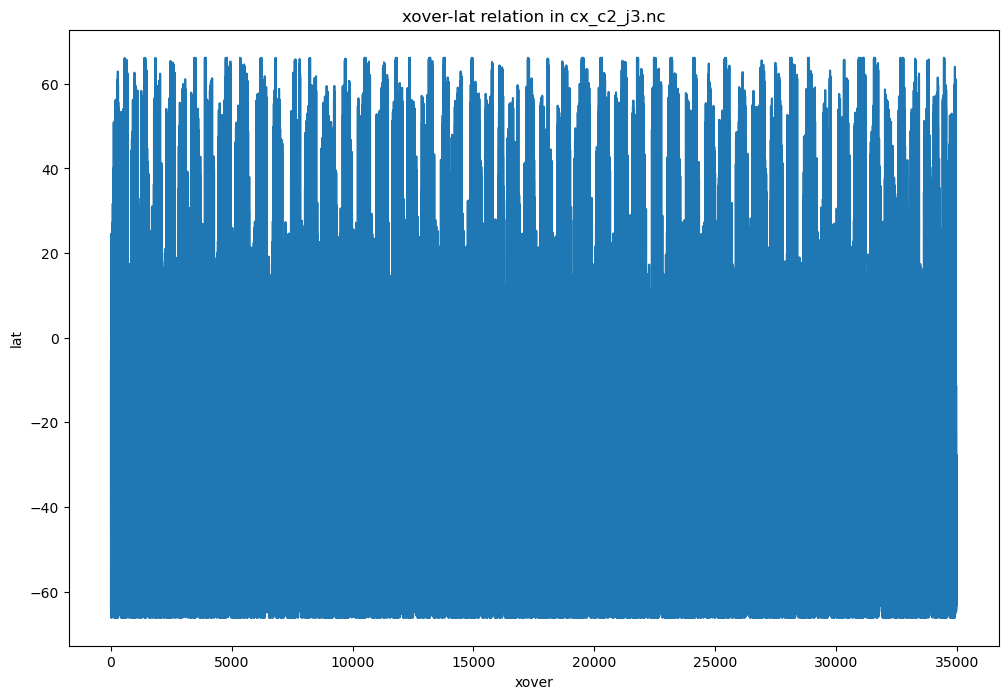

In [4]:
fig, ax = plt.subplots(figsize=(12, 8))
x = range(ds_cx.dims['xover'])
# check lat
ax.plot(x, ds_cx.lat)
ax.set_xlabel('xover')
ax.set_ylabel('lat')
ax.set_title('xover-lat relation in cx_c2_j3.nc')

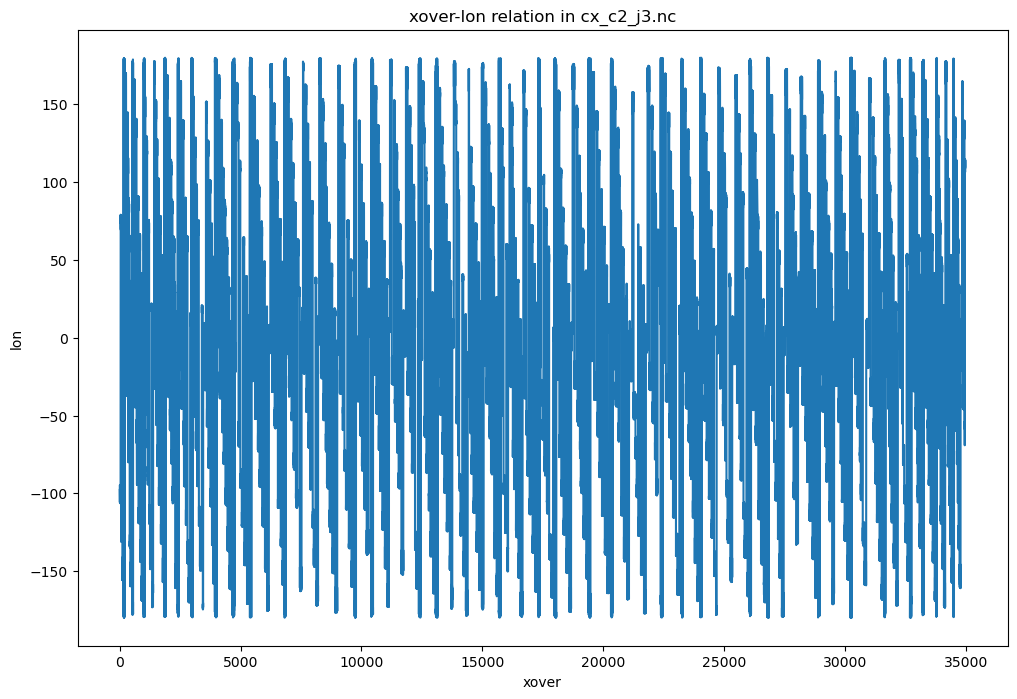

In [5]:
ax.clear()
ax.plot(x, ds_cx.lon)
ax.set_xlabel('xover')
ax.set_ylabel('lon')
ax.set_title('xover-lon relation in cx_c2_j3.nc')
# plt.show()
fig

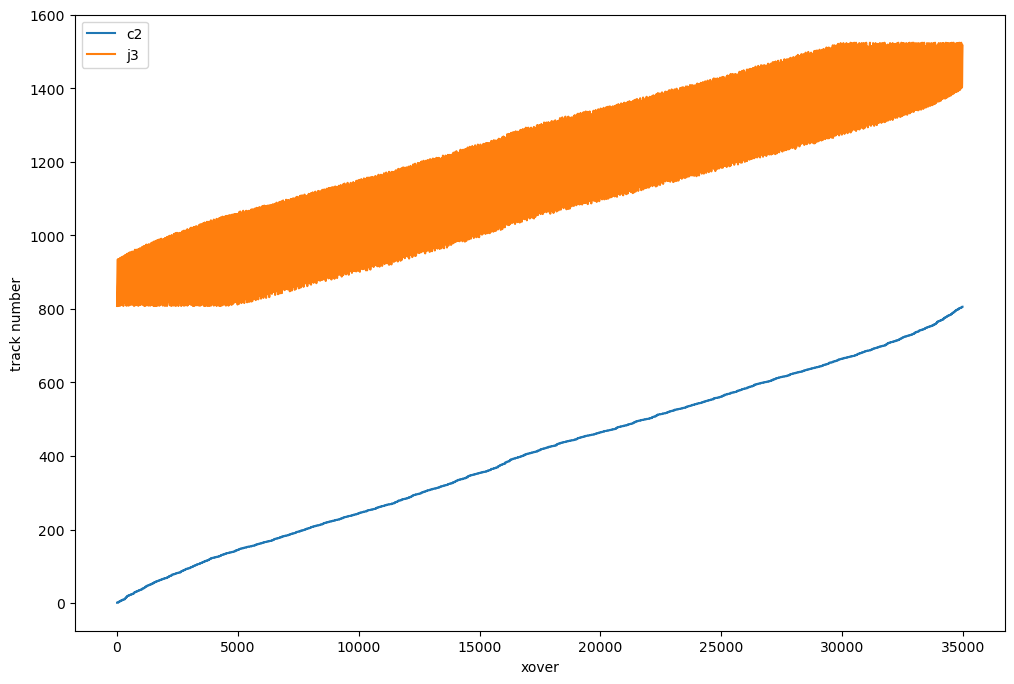

In [6]:
ax.clear()
ax.plot(x, ds_cx['track'][:, 0], label='c2')
ax.plot(x, ds_cx['track'][:, 1], label='j3')
ax.set_xlabel('xover')
ax.set_ylabel('track number')
ax.legend()
fig

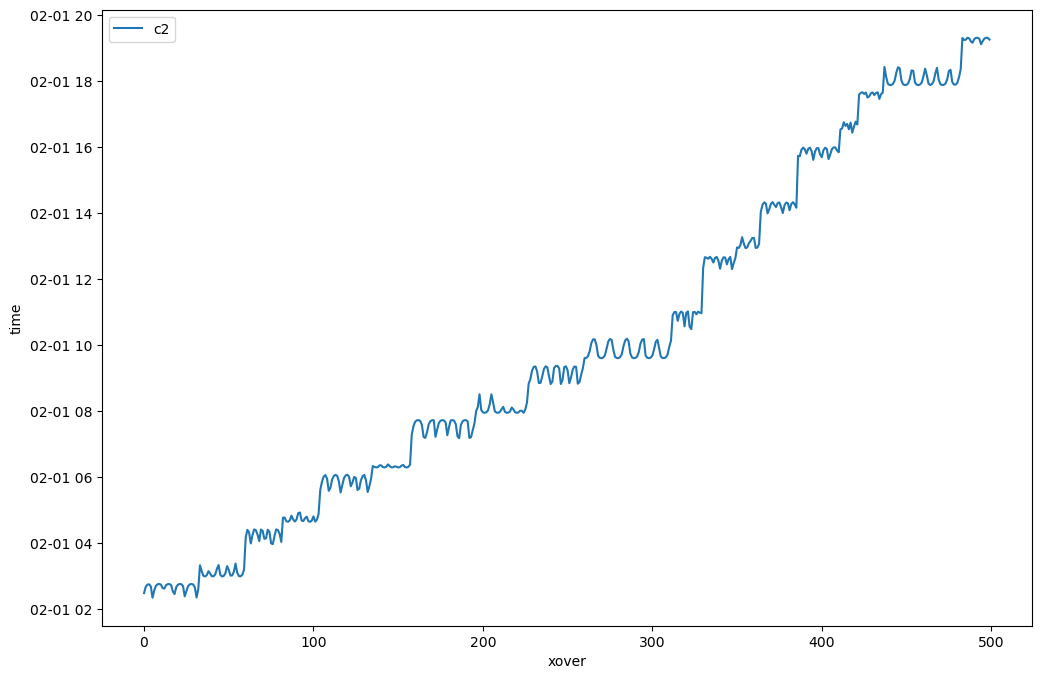

In [5]:
ax.clear()
# ax.plot(x, ds_cx['time'][:, 0], label='c2')
# ax.plot(x, ds_cx['time'][:, 1], label='j3')
# ax.plot(x, ds_cx['time'][:, 0], label='c2')
ax.plot(x[:500], ds_cx['time'][:500, 0], label='c2')
ax.set_xlabel('xover')
ax.set_ylabel('time')
ax.legend()
fig

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


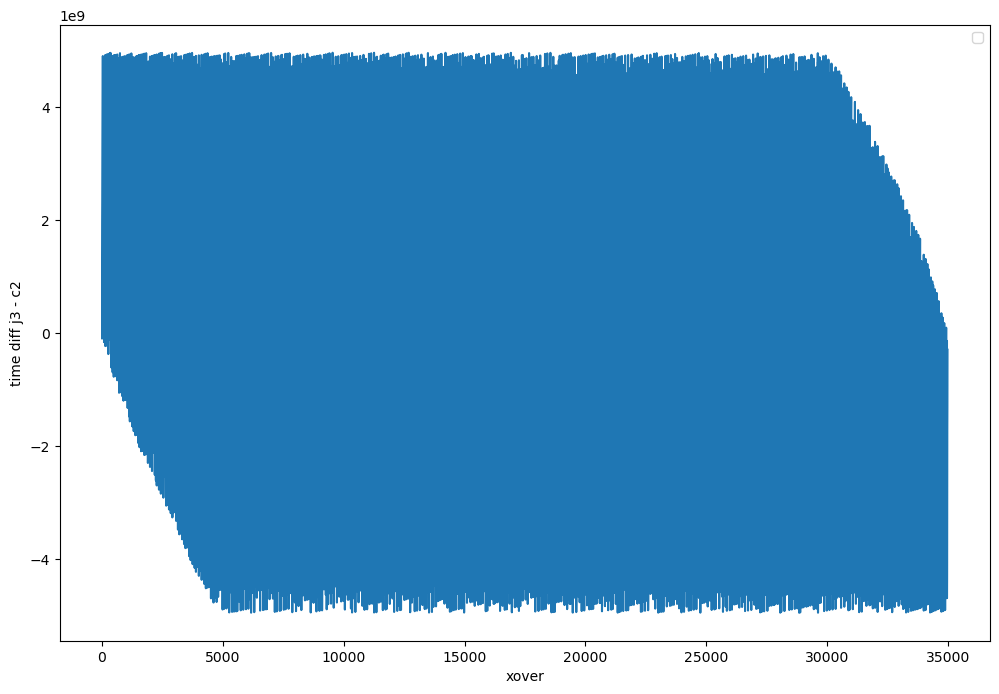

In [8]:
ax.clear()
ax.plot(x, (ds_cx['time'][:, 1] - ds_cx['time'][:, 0])/86400.)
ax.set_xlabel('xover')
ax.set_ylabel('time diff j3 - c2')
ax.legend()
fig

In [12]:
print((ds_cx['time'][:, 1] - ds_cx['time'][:, 0])/86400.)

<xarray.DataArray 'time' (xover: 34983)>
array([ -99703125,  -19287016,   60596971, ..., -460960850, -381081650,
       -300741796], dtype='timedelta64[ns]')
Coordinates:
    lat      (xover) float64 -5.766 -48.27 -62.24 -63.9 ... -62.92 -50.43 -11.55
    lon      (xover) float64 -97.85 -102.8 -105.4 -105.8 ... 114.2 111.8 107.1
Dimensions without coordinates: xover


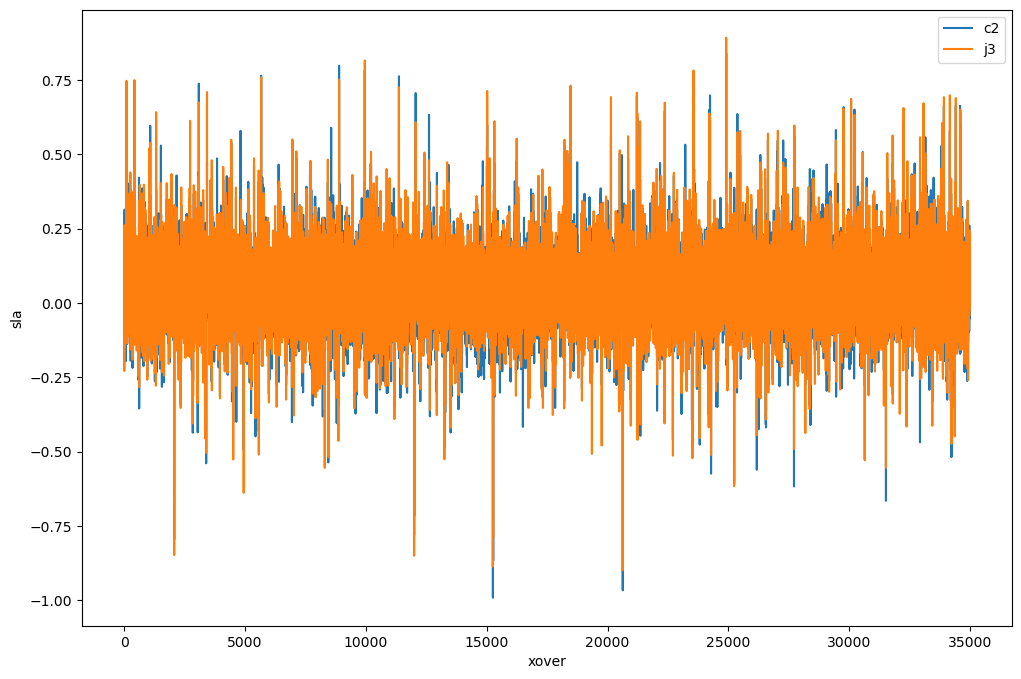

In [6]:
ax.clear()
ax.plot(x, ds_cx['sla'][:, 0], label='c2')
ax.plot(x, ds_cx['sla'][:, 1], label='j3')
ax.set_xlabel('xover')
ax.set_ylabel('sla')
ax.legend()
fig

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


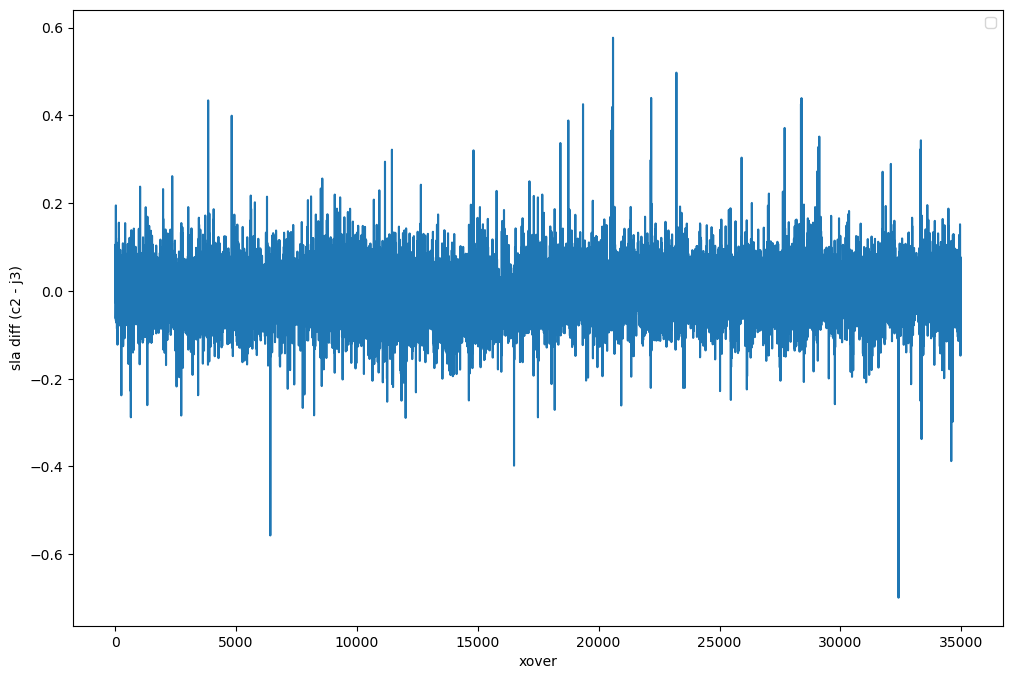

In [7]:
ax.clear()
ax.plot(x, ds_cx['sla'][:, 0] - ds_cx['sla'][:, 1])
ax.set_xlabel('xover')
ax.set_ylabel('sla diff (c2 - j3)')
ax.legend()
fig

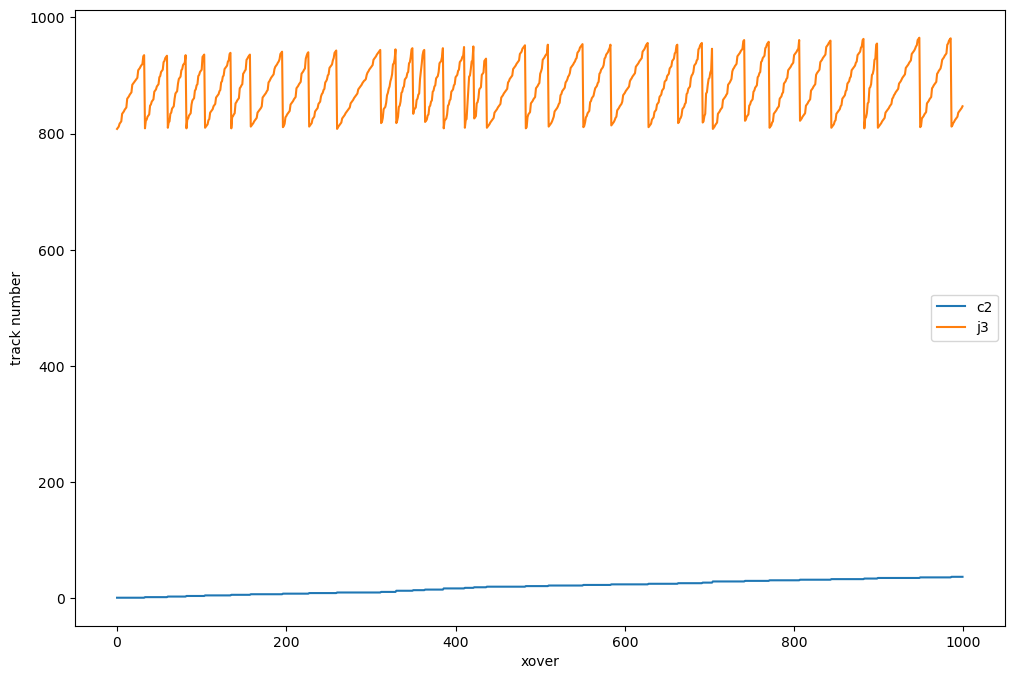

In [11]:
ax.clear()
ax.plot(x[0:1000], ds_cx['track'][0:1000, 0], label='c2')
ax.plot(x[0:1000], ds_cx['track'][0:1000, 1], label='j3')
ax.set_xlabel('xover')
ax.set_ylabel('track number')
ax.legend()
fig

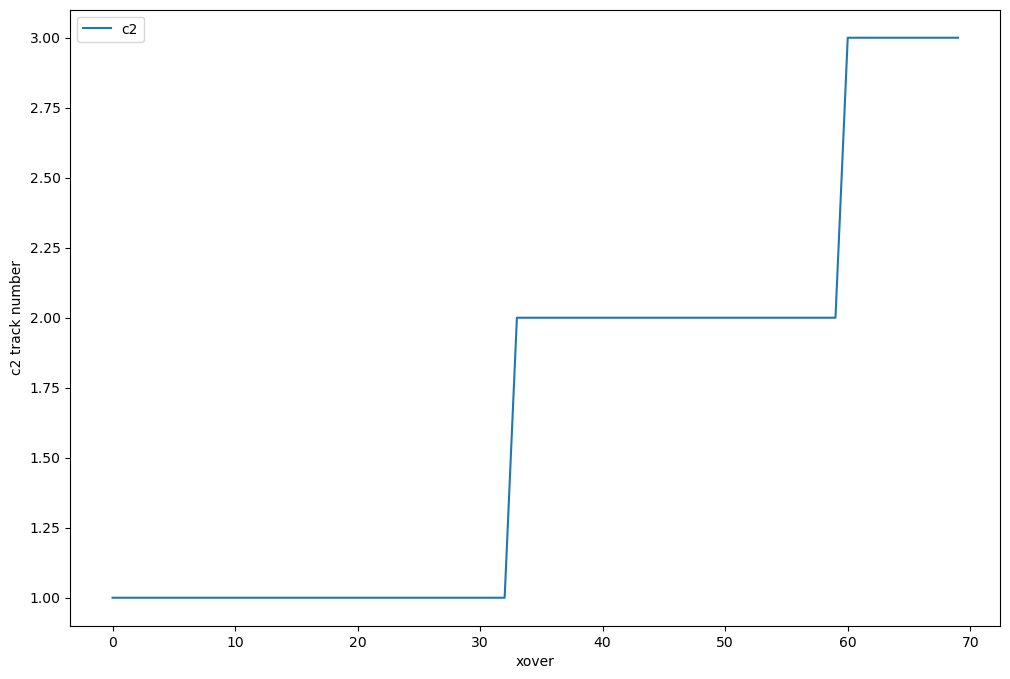

In [13]:
ax.clear()
ax.plot(x[0:70], ds_cx['track'][0:70, 0], label='c2')
# ax.plot(x[0:1000], ds_cx['track'][0:1000, 1], label='j3')
ax.set_xlabel('xover')
ax.set_ylabel('c2 track number')
ax.legend()
fig

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


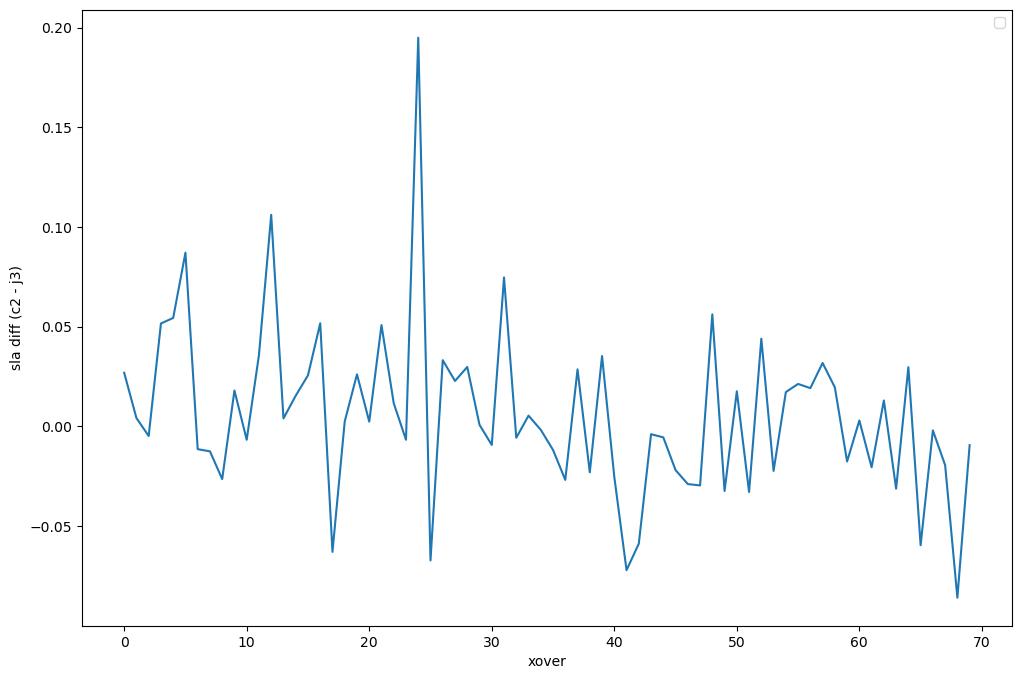

In [14]:
ax.clear()
ax.plot(x[:70], ds_cx['sla'][:70, 0] - ds_cx['sla'][:70, 1])
ax.set_xlabel('xover')
ax.set_ylabel('sla diff (c2 - j3)')
ax.legend()
fig

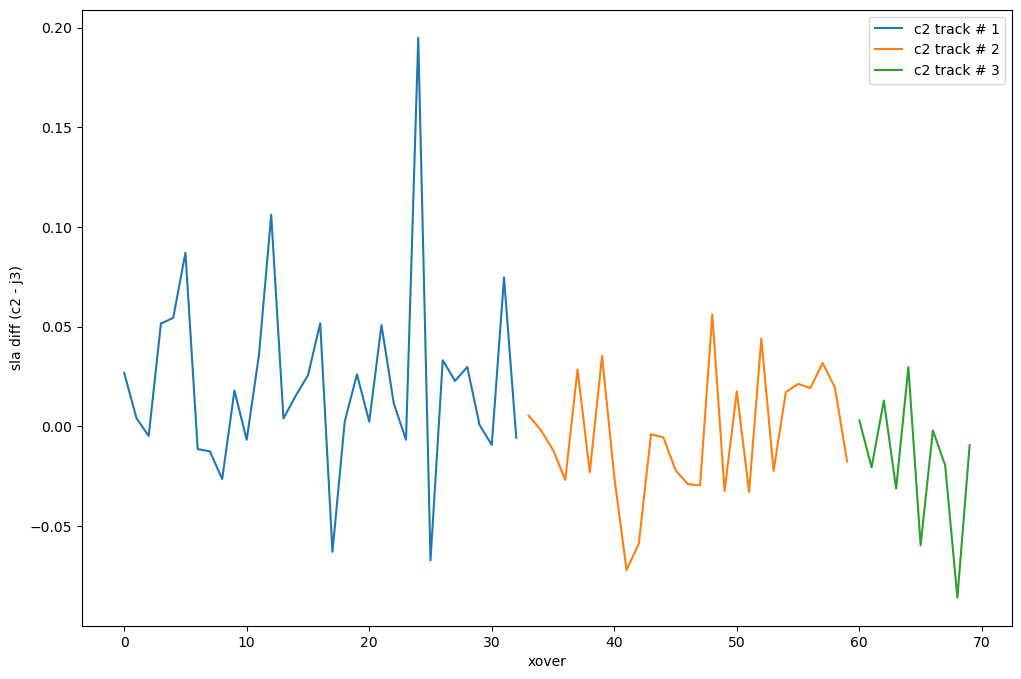

In [15]:
ax.clear()
ax.plot(x[:33], ds_cx['sla'][:33, 0] - ds_cx['sla'][:33, 1], label='c2 track # 1')
ax.plot(x[33:60], ds_cx['sla'][33:60, 0] - ds_cx['sla'][33:60, 1], label='c2 track # 2')
ax.plot(x[60:70], ds_cx['sla'][60:70, 0] - ds_cx['sla'][60:70, 1], label='c2 track # 3')
ax.set_xlabel('xover')
ax.set_ylabel('sla diff (c2 - j3)')
ax.legend()
fig

In [16]:
print(len(set(list(ds_cx['track'].data[:, 0]))))

737


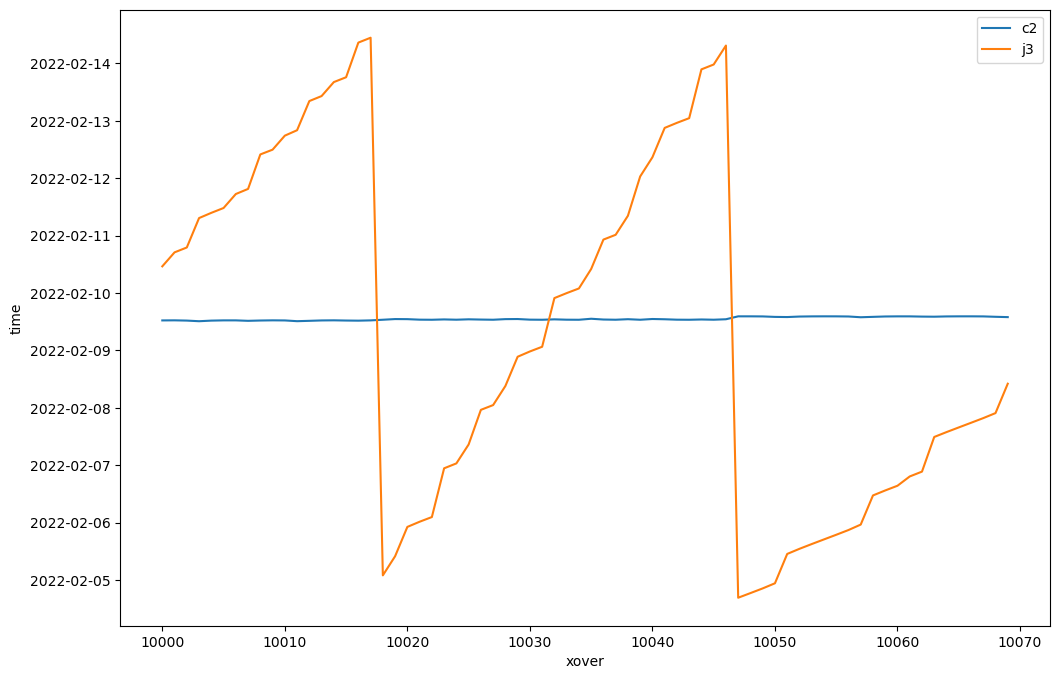

In [17]:
ax.clear()
ax.plot(x[10000:10070], ds_cx['time'][10000:10070, 0], label='c2')
ax.plot(x[10000:10070], ds_cx['time'][10000:10070, 1], label='j3')
ax.set_xlabel('xover')
ax.set_ylabel('time')
ax.legend()
fig

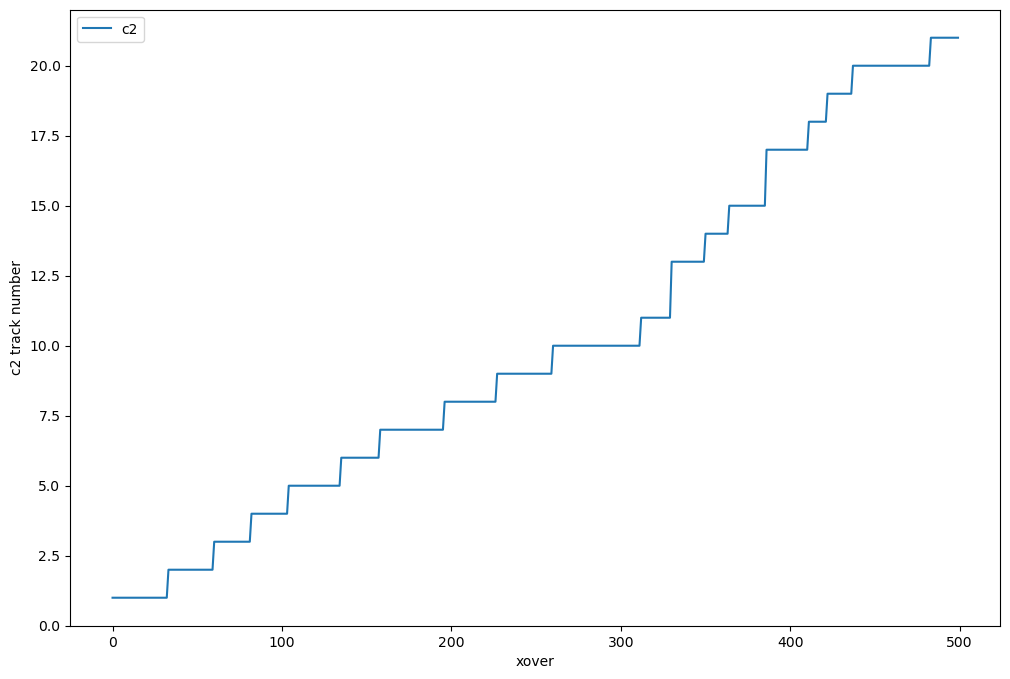

In [21]:
ax.clear()
ax.plot(x[0:500], ds_cx['track'][0:500, 0], label='c2')
# ax.plot(x[0:1000], ds_cx['track'][0:1000, 1], label='j3')
ax.set_xlabel('xover')
ax.set_ylabel('c2 track number')
ax.legend()
fig

In [8]:
lst_1stIdxOfPass = [0]
for i in range(1, 500):
    if ds_cx['track'].data[i, 0] != ds_cx['track'].data[i-1, 0]:
        lst_1stIdxOfPass.append(i)
print('lst_1stIdxOfPass: \n', lst_1stIdxOfPass)
numOfObsForEachPass = [lst_1stIdxOfPass[i] - lst_1stIdxOfPass[i-1] for i in range(1, len(lst_1stIdxOfPass))]
print('numOfObsForEachPass: \n', numOfObsForEachPass)

lst_1stIdxOfPass: 
 [0, 33, 60, 82, 104, 135, 158, 196, 227, 260, 312, 330, 350, 364, 386, 411, 422, 437, 483]
numOfObsForEachPass: 
 [33, 27, 22, 22, 31, 23, 38, 31, 33, 52, 18, 20, 14, 22, 25, 11, 15, 46]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



i= 1
idxmin_loc= <xarray.DataArray 'time' ()>
array(5) , idxmin_glo= <xarray.DataArray 'time' ()>
array(5)
idxmax_loc= <xarray.DataArray 'time' ()>
array(28) , idxmax_glo= <xarray.DataArray 'time' ()>
array(28)

i= 2
idxmin_loc= <xarray.DataArray 'time' ()>
array(3) , idxmin_glo= <xarray.DataArray 'time' ()>
array(36)
idxmax_loc= <xarray.DataArray 'time' ()>
array(21) , idxmax_glo= <xarray.DataArray 'time' ()>
array(54)

i= 3
idxmin_loc= <xarray.DataArray 'time' ()>
array(16) , idxmin_glo= <xarray.DataArray 'time' ()>
array(76)
idxmax_loc= <xarray.DataArray 'time' ()>
array(18) , idxmax_glo= <xarray.DataArray 'time' ()>
array(78)

i= 4
idxmin_loc= <xarray.DataArray 'time' ()>
array(16) , idxmin_glo= <xarray.DataArray 'time' ()>
array(98)
idxmax_loc= <xarray.DataArray 'time' ()>
array(10) , idxmax_glo= <xarray.DataArray 'time' ()>
array(92)

i= 5
idxmin_loc= <xarray.DataArray 'time' ()>
array(12) , idxmin_glo= <xarray.DataArray 'time' ()>
array(116)
idxmax_loc= <xarray.DataArray 'time'

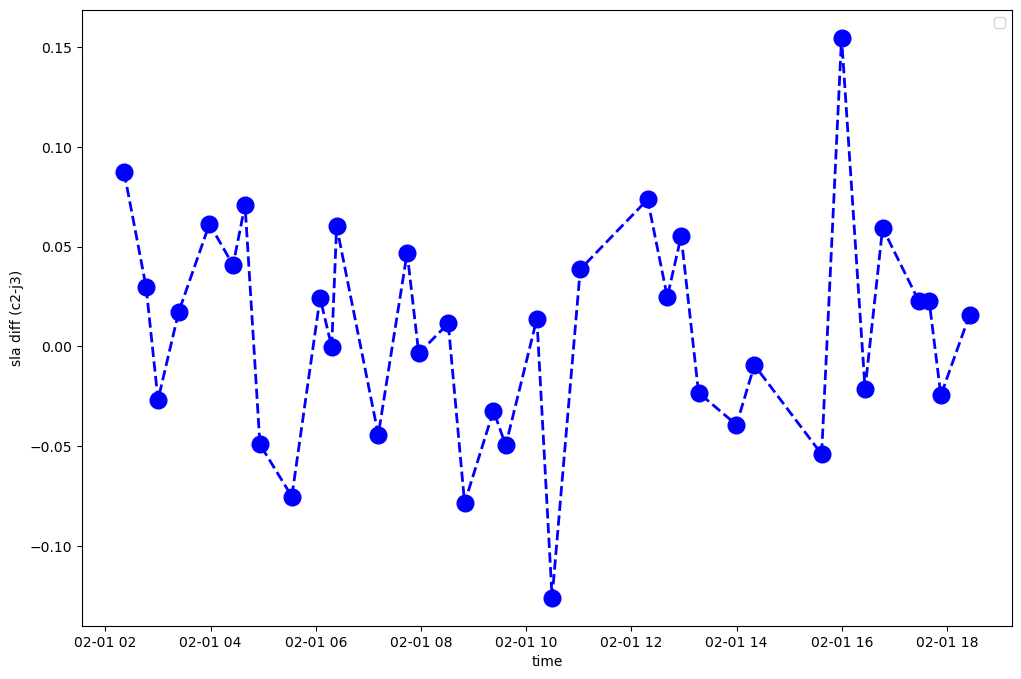

In [9]:
# BE AWARE: the time is not necessarily in ascending order!!! need to sort first! no need to sort?

x_spl = []
y_spl = []
for i in range (1, len(lst_1stIdxOfPass)):
    print('\ni=', i)
    idxmin_loc = ds_cx['time'][lst_1stIdxOfPass[i-1] : lst_1stIdxOfPass[i], 0].argmin()
    idxmax_loc = ds_cx['time'][lst_1stIdxOfPass[i-1] : lst_1stIdxOfPass[i], 0].argmax()
    idxmin_glo = lst_1stIdxOfPass[i-1] + idxmin_loc
    idxmax_glo = lst_1stIdxOfPass[i-1] + idxmax_loc
    print('idxmin_loc=', idxmin_loc, ', idxmin_glo=', idxmin_glo)
    print('idxmax_loc=', idxmax_loc, ', idxmax_glo=', idxmax_glo)
    
    x_spl.append(ds_cx['time'].data[idxmin_glo, 0])
    x_spl.append(ds_cx['time'].data[idxmax_glo, 0])
    y_spl.append(ds_cx['sla'].data[idxmin_glo, 0] - ds_cx['sla'].data[idxmin_glo, 1])
    y_spl.append(ds_cx['sla'].data[idxmax_glo, 0] - ds_cx['sla'].data[idxmax_glo, 1])  

print(x_spl)  
print(y_spl)

ax.clear()
ax.plot(x_spl, y_spl, 'bo--', linewidth=2, markersize=12)
# ax.plot(x[0:1000], ds_cx['track'][0:1000, 1], label='j3')
ax.set_xlabel('time')
ax.set_ylabel('sla diff (c2-j3)')
ax.legend()
fig

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[numpy.datetime64('2022-02-01T02:29:42.026383616'), numpy.datetime64('2022-02-01T02:36:57.825120256'), numpy.datetime64('2022-02-01T03:20:24.101652736'), numpy.datetime64('2022-02-01T03:12:15.751552000'), numpy.datetime64('2022-02-01T04:10:57.573886208'), numpy.datetime64('2022-02-01T04:02:44.043871488'), numpy.datetime64('2022-02-01T04:46:50.593429760'), numpy.datetime64('2022-02-01T04:53:23.329439744'), numpy.datetime64('2022-02-01T05:37:01.918078720'), numpy.datetime64('2022-02-01T05:57:57.723625216'), numpy.datetime64('2022-02-01T06:20:32.556496896'), numpy.datetime64('2022-02-01T06:23:00.243525632'), numpy.datetime64('2022-02-01T07:17:41.865420544'), numpy.datetime64('2022-02-01T07:38:13.042704640'), numpy.datetime64('2022-02-01T08:00:16.043294976'), numpy.datetime64('2022-02-01T08:15:56.942638848'), numpy.datetime64('2022-02-01T08:50:05.069037568'), numpy.datetime64('2022-02-01T09:18:20.121456384'), numpy.datetime64('2022-02-01T09:36:34.678703360'), numpy.datetime64('2022-02-01T1

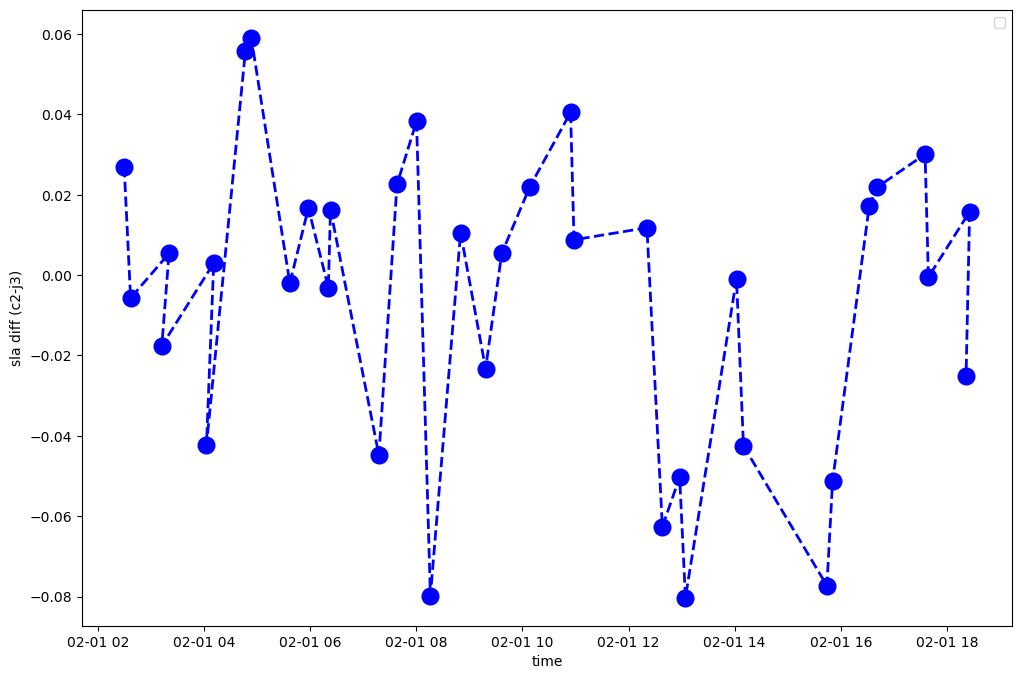

In [8]:
# 2023-08-16, wrong, c2's time is not in ascending order!!
# will just leave it here for future comparison.
x_spl = [ds_cx['time'].data[lst_1stIdxOfPass[0], 0]]
y_spl = [ds_cx['sla'].data[lst_1stIdxOfPass[0], 0] - ds_cx['sla'].data[lst_1stIdxOfPass[0], 1]]
for i in range(1, len(lst_1stIdxOfPass)-1):  # 19
    x_spl.append(ds_cx['time'].data[lst_1stIdxOfPass[i]-1, 0])
    x_spl.append(ds_cx['time'].data[lst_1stIdxOfPass[i]  , 0])
    y_spl.append(ds_cx['sla'].data[lst_1stIdxOfPass[i]-1, 0] - ds_cx['sla'].data[lst_1stIdxOfPass[i]-1, 1])
    y_spl.append(ds_cx['sla'].data[lst_1stIdxOfPass[i]  , 0] - ds_cx['sla'].data[lst_1stIdxOfPass[i]  , 1])
x_spl.append(ds_cx['time'].data[lst_1stIdxOfPass[-1]-1, 0])
y_spl.append(ds_cx['sla'].data[lst_1stIdxOfPass[-1]-1, 0] - ds_cx['sla'].data[lst_1stIdxOfPass[-1]-1, 1])

print(x_spl)  # BE AWARE: the time is not necessarily in ascending order!!!
print(y_spl)

ax.clear()
ax.plot(x_spl, y_spl, 'bo--', linewidth=2, markersize=12)
# ax.plot(x[0:1000], ds_cx['track'][0:1000, 1], label='j3')
ax.set_xlabel('time')
ax.set_ylabel('sla diff (c2-j3)')
ax.legend()
fig

In [16]:
#print(type(x_spl))
#print(type(x_spl[0]))
#print(type(y_spl))
#print(type(y_spl[0]))
#print(np.array(x_spl, dtype='float64'))

ref_time = np.datetime64('1985-01-01T00:00:00')
#x_time = (ds_cx['time'] - ref_time) / np.timedelta64(1, 's')
#print(x_time[:20])

x_spl_flt = (x_spl - ref_time) / np.timedelta64(1, 's')
print(type(x_spl_flt))
print(x_spl_flt)
# tck, u = scipy.interpolate.splprep([x_spl_flt, y_spl], s=0)
tck = scipy.interpolate.splrep(x_spl_flt, y_spl)
print('tck: \n', tck)
# print('\n\n u: \n', u)

tnew = pd.date_range(start=ds_cx['time'].data[lst_1stIdxOfPass[0], 0], end=ds_cx['time'].data[lst_1stIdxOfPass[-1], 0], freq='5T').to_numpy()
print(type(tnew))
print(type(tnew[0]))
# print('\n\n tnew: \n', tnew)

tnew_flt = (tnew - ref_time) / np.timedelta64(1, 's')
print(type(tnew_flt))
# print(tnew_flt)

fitted_spl = scipy.interpolate.splev(tnew_flt, tck)
print('\n\n fitted_spl: ', fitted_spl)



<xarray.DataArray 'time' (xover: 20, leg: 2)>
array([[1.17029698e+09, 1.17028837e+09],
       [1.17029768e+09, 1.17029602e+09],
       [1.17029792e+09, 1.17030315e+09],
       [1.17029795e+09, 1.17031713e+09],
       [1.17029771e+09, 1.17032429e+09],
       [1.17029648e+09, 1.17033260e+09],
       [1.17029726e+09, 1.17037641e+09],
       [1.17029778e+09, 1.17038386e+09],
       [1.17029795e+09, 1.17039093e+09],
       [1.17029798e+09, 1.17039790e+09],
       [1.17029791e+09, 1.17040491e+09],
       [1.17029752e+09, 1.17041225e+09],
       [1.17029748e+09, 1.17046439e+09],
       [1.17029785e+09, 1.17047167e+09],
       [1.17029797e+09, 1.17047869e+09],
       [1.17029797e+09, 1.17048567e+09],
       [1.17029785e+09, 1.17049272e+09],
       [1.17029716e+09, 1.17050040e+09],
       [1.17029688e+09, 1.17054458e+09],
       [1.17029764e+09, 1.17055230e+09]])
Coordinates:
    lat      (xover) float64 -5.766 -48.27 -62.24 -63.9 ... -16.64 0.3704 -45.76
    lon      (xover) float64 ...
    tr

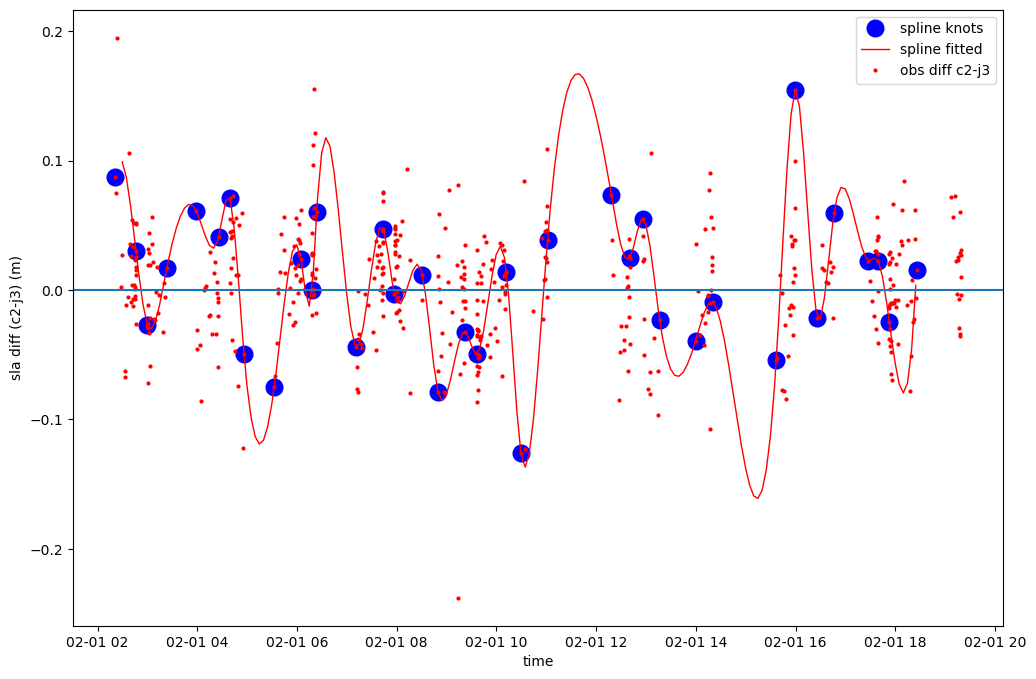

In [20]:
ax.clear()
# ax.plot(x_spl, y_spl, 'bo--', linewidth=2, markersize=12, label='spline knots')
ax.plot(x_spl, y_spl, 'bo', markersize=12, label='spline knots')
# ax.plot(tnew[:len(tnew)-10], fitted_spl[:len(tnew)-10], 'ro--', linewidth=2, markersize=6, label='spline fitted')
ax.plot(tnew[:len(tnew)-10], fitted_spl[:len(tnew)-10], 'r', linewidth=1, label='spline fitted')
ax.plot(ds_cx['time'][:500, 0], ds_cx['sla'][:500, 0] - ds_cx['sla'][:500, 1], 'ro', markersize=2, label='obs diff c2-j3')
ax.axhline()
# ax.plot(x[0:1000], ds_cx['track'][0:1000, 1], label='j3')
ax.set_xlabel('time')
ax.set_ylabel('sla diff (c2-j3) (m)')
ax.legend()
fig
# fig.savefig('cubicSplineFitting_02.png')